<a href="https://colab.research.google.com/github/pathvasariah/DS_Project/blob/main/DSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Ciências de Dados


---

Cenário Atual

Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a relação entre os dados de colesterol e peso com a incidência de problemas que influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e tratamento para esses tipos de causa, a operadora quer realizar um estudo para identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar medidas preventivas e palestras de cuidados médicos. Para isso, a operadora conta com a equipe de cientista de dados para ajuda-los a encontrar o grupo de risco dentre essas pessoas.

Através da análise dos dados, as analistas da operadora de seguro de saúde identificaram 3 grandes grupos:



1.   Alto Risco.
2.   Risco Moderado.
3.   Baixo Risco.

### Objetivos do projeto


---



*   Coleta de dados.
*   Análise dos dados coletados.
*   Tratamento de dados.
*   Manipulação e visualização dos dados.
*   Aplicação de algoritmo Machine Learning.
*  Análise de dados gerados.

## Importando bibliotecas




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

## Verificando versões das bibliotecas

In [ ]:
import sklearn
import plotly

print(f''' Verificando as versões das bibliotecas:\n
      pandas: {pd.__version__}
      sklearn: {sklearn.__version__}
      plotly: {plotly.__version__}
''')

 Verificando as versões das bibliotecas:

      pandas: 2.0.3
      sklearn: 1.2.2
      plotly: 5.15.0



## Coleta de dados


---

Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento. As coletas de dados podem ocorrer em:



*   Banco de dados SQL/NoSQL.
*   Planilhas eletrônicas.
*   Arquivos de texto.
*   Websites.
*   API´s.
*   Frameworks e etc.


---



Para esse projeto vamos coletar dados já estruturados de dois tipos de arquivos.


*   Um arquivo Excel em formato xlxs e outro no formato csv.


##Coletando dados de estados brasileiros









In [ ]:
# Coleta de dados de estados
estados = pd.read_csv('/content/estados_br.csv', sep=';', encoding='latin-1')
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


## Coletando dados de clientes

Agora vamos coletar os dados fornecidos de clientes da operadora de saúde.

In [ ]:
# Coleta de dados de clientes
clientes = pd.read_excel('/content/clientes_operadora_saude.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


## Coletando dados das idades dos clientes

In [ ]:
# Coletando idade de clientes
idades = pd.read_csv('/content/idade_clientes.csv', sep=';')
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


## Analisando dados coletados


---

Vamos analisar os dados coletados a fim de identificar possíveis erros e inconscistências.

In [ ]:
# Info da base de clientes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [ ]:
# Describe da base de clientes
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [ ]:
# Info da base de estados brasileiros
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
# Describe dos estados
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [ ]:
# Info da base de idades
idades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
# Describe da base de idades
idades.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


##Analisando dados ausentes

Nessa etapa, vamos analisar se os dados coletados possuem algum dado nulo ou ausente. É muito importante analisar esses dados para ver se é necessário fazer algum tratamento e corrigir os dados.

In [ ]:
# Analisando dados de clientes
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
# Analisando dados de estados
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
# Analisando dados de idades
idades.isna().sum()

id_cliente    0
idade         0
dtype: int64

## Visualizando dados ausentes

Vamos criar visualização dos dados ausentes da base de clientes

In [ ]:
# Verificando registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
32,33,NaN,188,Masculino,22
41,42,NaN,177,Masculino,20
87,88,NaN,168,Feminino,12


##Tratamento de dados coletados


---

É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

###Dados ausentes
Identicamos 3 valores ausentes na base de dados de clientes. Para esse caso, temos 3 opções para tratamento de dados númericos.

1. Eliminação dos registros;
2. Média dos pesos dos clientes: Realiza a média dos pesos;
  * OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos. (medida que pega o valor central dos dados)

Por exemplo:

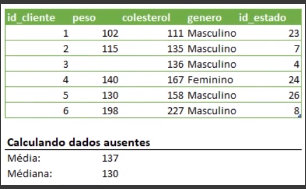

## Eliminação de dados
Um das formas para tratar um dado ausente é elimina-lo. No entanto, é recomendável sempre analisar os dados primeiramente a fim de identificar se existe alguma outra maneira para corrigi-los. Mas se não for possível e a quantidade de dados nulos forem estatisticamente pequeno em relação ao total de registros da base, podemos utilizar a estratégia de eliminação de dados.

In [ ]:
# Eliminando dados ausentes do clientes
clientes.dropna(subset = ['peso'], inplace = True)

In [ ]:
clientes

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
...,...,...,...,...,...
220,221,180.0,219,Masculino,20
221,222,116.0,138,Feminino,15
222,223,144.0,169,Feminino,18
223,224,102.0,116,Masculino,6


In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    222
peso          222
colesterol    222
genero        222
id_estado     222
dtype: int64

## Corrigindo dados ausentes por outras medidas (média / mediana)

Uma outra alternativa muito utilizada é corrigir os dados ausentes baseado em outras medidas obtidas da análise dos dados coletados.

In [ ]:
# Visualiando estatísticas do dataset de clientes
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,222.000000,222.000000,222.000000,222.000000
mean,113.792793,142.315315,168.612613,13.653153
std,65.113700,31.198817,39.654999,7.580128
min,1.000000,95.000000,102.000000,1.000000
25%,58.250000,115.000000,135.000000,7.000000
50%,114.500000,138.500000,167.500000,13.500000
75%,169.750000,170.000000,206.250000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [ ]:
# Realizando a média e mediana da variável peso
media = clientes.peso.mean()
mediana = clientes['peso'].median()

In [ ]:
# Verificando valores
print(f'O valor da média é: {media} e o valor da mediana é: {mediana}')

O valor da média é: 142.3153153153153 e o valor da mediana é: 138.5


In [ ]:
# Fazendo arredodamento da variável média
round(media,2)

142.32

In [ ]:
# Preencher valores ausentes pela média
clientes.peso.fillna(round(media, 2), inplace = True)

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    225
peso          225
colesterol    225
genero        225
id_estado     225
dtype: int64

##Dados ausentes para variáveis categóricas

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [ ]:
estados.pais.value_counts()

pais
Brasil    22
Name: count, dtype: int64

In [ ]:
# Moda 1° elemento
estados.pais.mode()[0]

'Brasil'

In [ ]:
correcao_categoria = estados.pais.mode()[0]
print(correcao_categoria)

Brasil


In [ ]:
# Corrigindo baseado na moda
estados.pais.fillna(correcao_categoria, inplace = True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

##Manipulação e visualização de dados
Nesta etapa, vamos analisar os dados já tratados. A ideia é aprofundar um pouco mais na análise afim de identificar e conhecer mais os dados.



<Axes: title={'center': 'Peso dos clientes'}, xlabel='peso', ylabel='Count'>

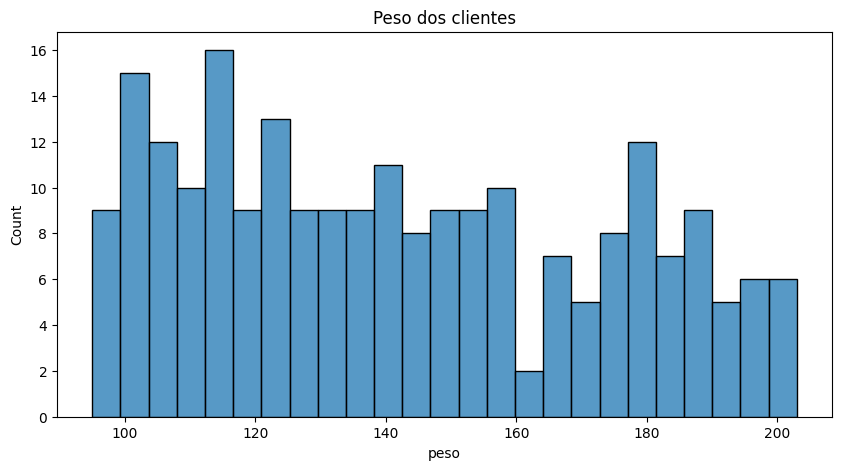

In [ ]:
# Criando histograma baseado no peso dos clientes
plt.figure(figsize = (10, 5))
plt.title('Peso dos clientes')
sns.histplot(clientes.peso, bins = 25)

<Axes: title={'center': 'Colesterol dos clientes'}, xlabel='colesterol', ylabel='Count'>

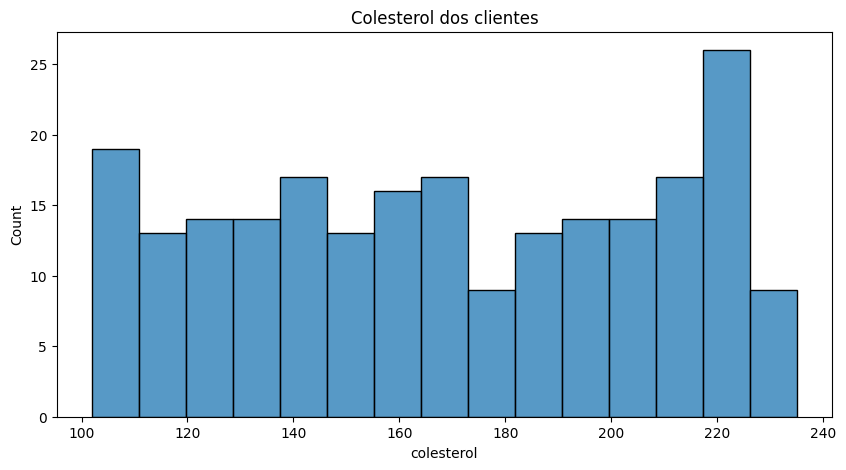

In [ ]:
# Criando histograma baseado no Colesterol dos clientes
plt.figure(figsize = (10, 5))
plt.title('Colesterol dos clientes')
sns.histplot(clientes['colesterol'], bins = 15)


##Criando gráfico de boxplot
O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.

O Box Plot fornece informação sobre as seguintes caracteristicas do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).

Em um boxplot são apresentadas 5 estatisticas: o minimo, o primeiro quartil (Q1), a mediana, o terceiro quartil (Q3) e o máximo. Esses valores também são chamados de resumo dos cinco números.

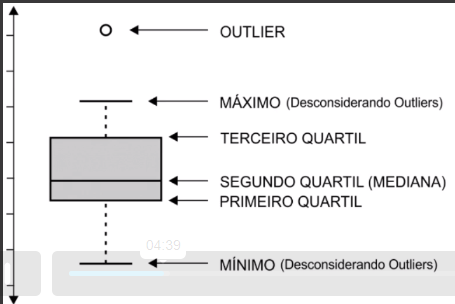

<Axes: title={'center': 'Boxplot para idade dos clientes'}, xlabel='idade'>

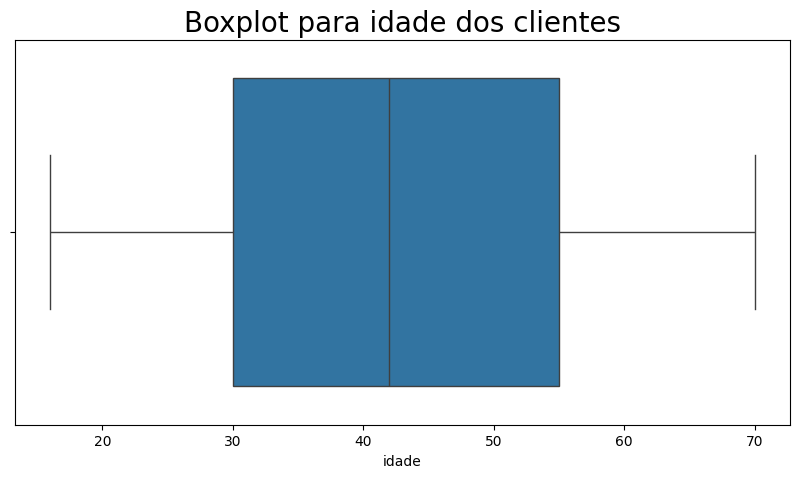

In [ ]:
# Criando boxplot para idade dos clientes
plt.figure(figsize = (10, 5))
plt.title('Boxplot para idade dos clientes', size = 20)
sns.boxplot(x = 'idade', data = idades, orient = 'h')

<Axes: title={'center': 'Boxplot para colesterol dos clientes'}, xlabel='colesterol'>

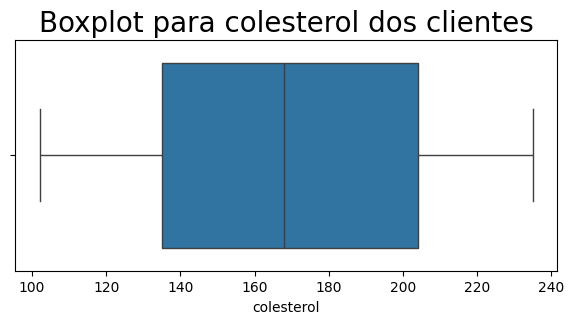

In [ ]:
# Criando boxplot para colesterol dos clientes
plt.figure(figsize = (7, 3))
plt.title('Boxplot para colesterol dos clientes', size = 20)
sns.boxplot(x = 'colesterol', data = clientes)

In [ ]:
clientes['colesterol'].describe()

count    225.000000
mean     168.733333
std       39.413671
min      102.000000
25%      135.000000
50%      168.000000
75%      204.000000
max      235.000000
Name: colesterol, dtype: float64

<Axes: title={'center': 'Boxplot para peso dos clientes'}, xlabel='peso'>

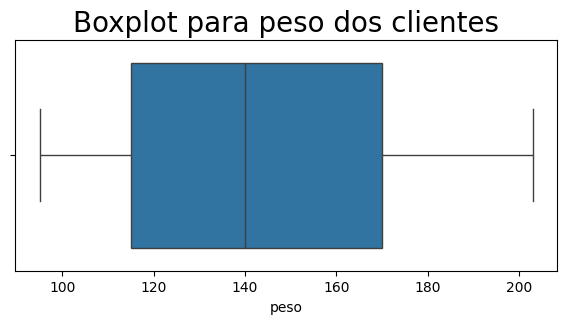

In [ ]:
# Criando boxplot para peso dos clientes
plt.figure(figsize = (7, 3))
plt.title('Boxplot para peso dos clientes', size = 20)
sns.boxplot(x = 'peso', data = clientes)

<Axes: title={'center': 'Correlação entre colesterol e peso'}>

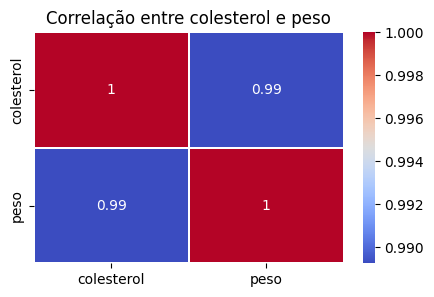

In [ ]:
# Gerando correlação entre peso e colesterol
plt.figure(figsize=(5,3))
plt.title('Correlação entre colesterol e peso')
dados_correlacao = clientes[['colesterol','peso']]
sns.heatmap(dados_correlacao.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

## Enriquecendo dados coletados

---

Nessa etapa vamos ennriquecer nossa base de dados e realizar a junção entre os datasets.

In [ ]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [ ]:
# Criando um identificador para a variável gênero.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
clientes['id_genero'] = LE.fit_transform(clientes['genero'])

## Junção entre os dados coletados


---

Nessa etapa vamos realizar o merge entre os dados qe realizamos a coleta.

In [ ]:
# Verificando dados de clientes
clientes[:10]

,id_cliente,peso,colesterol,genero,id_estado,id_genero
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1
7,8,145.0,176,Feminino,25,0
8,9,191.0,223,Feminino,16,0
9,10,186.0,221,Masculino,6,1


In [ ]:
# Verificando dados de estados
estados[:3]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil


## Realizando junção entre dataset de clientes e estados

In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


## Realizando junção entre dataset de clientes_estados e idades

In [ ]:
# Junção clientes_estados e idades
clientes_operadora = pd.merge(clientes_estados, idades, on='id_cliente').sort_values('id_cliente')

In [ ]:
clientes_operadora[:15]

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
47,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
40,7,114.0,131,Masculino,26,1,Sergipe,se,Brasil,30
56,8,145.0,176,Feminino,25,0,São Paulo,sp,Brasil,30
61,9,191.0,223,Feminino,16,0,Paraná,pr,Brasil,34
66,10,186.0,221,Masculino,6,1,Ceará,ce,Brasil,55


In [ ]:
# Resetando o index do dataset criado
clientes_operadora.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


## Organizando a base de dados

In [ ]:
clientes_operadora[:3]

,id_cliente,peso,colesterol,genero,id_estado,id_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62


### Alterando o nome das colunas

In [ ]:
clientes_operadora.rename(columns={'id_cliente' : 'cod_cliente', 'id_genero' : 'cod_genero'}, inplace=True)
clientes_operadora

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


### Alterando o conteúdo da variável sigla do estado

In [ ]:
# Alterando as linhas da sigla_estado
clientes_operadora.sigla_estado.str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [ ]:
# Inserindo alteração realizada
clientes_operadora.sigla_estado = clientes_operadora.sigla_estado.str.upper()

# Ou clientes_operadora['sigla_estado'] = clientes_operadora.sigla_estado.str.upper()


In [ ]:
clientes_operadora[:3]

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62


## Alterando disposição das colunas do arquivo de dados
Alterar ordem a fim de facilitar a visualização.

In [ ]:
# Selecionando ordem das colunas a serem visualizadas
ordem_colunas = ['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado']
clientes_operadora[ordem_colunas]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado
0,1,Masculino,17,102.0,111,23,Roraima,RR
9,2,Masculino,28,115.0,135,7,Distrito Federal,DF
21,3,Masculino,62,115.0,136,4,Amazonas,AM
32,4,Feminino,55,140.0,167,24,Santa Catarina,SC
39,5,Masculino,44,130.0,158,26,Sergipe,SE
...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN
126,222,Feminino,38,116.0,138,15,Paraíba,PB
196,223,Feminino,24,144.0,169,18,Piauí,PI
77,224,Masculino,31,102.0,116,6,Ceará,CE


In [ ]:
# Atribuindo alteração ao dataframe
clientes_operadora = clientes_operadora[ordem_colunas].reset_index(drop=True)

In [ ]:
clientes_operadora

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado
0,1,Masculino,17,102.0,111,23,Roraima,RR
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF
2,3,Masculino,62,115.0,136,4,Amazonas,AM
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC
4,5,Masculino,44,130.0,158,26,Sergipe,SE
...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN
221,222,Feminino,38,116.0,138,15,Paraíba,PB
222,223,Feminino,24,144.0,169,18,Piauí,PI
223,224,Masculino,31,102.0,116,6,Ceará,CE


##Aplicação do Modelo de Machine Learning


---


É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestesterol, peso e idade das pessoas.

##Aplicando método do cotovelo
Vamos iniciar visualizando e identificando o número de clusters necessários para realizar o agrupamento.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Criando função para calcular o WCSS
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
# Criando dados de clientes com as variáveis peso, colesterol e idade
dados_clientes = clientes_operadora[['peso', 'colesterol', 'idade']]
dados_clientes.head()

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44


In [ ]:
# Calculando wcss com os dados de clientes
wcss_clientes = calcular_wcss(dados_clientes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i+1} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 1 possui valor de WCSS de: 615755.6435484447
O cluster 2 possui valor de WCSS de: 189212.54409773235
O cluster 3 possui valor de WCSS de: 110985.62659521378
O cluster 4 possui valor de WCSS de: 85993.49644839708
O cluster 5 possui valor de WCSS de: 72765.0926995486
O cluster 6 possui valor de WCSS de: 60402.61567119764
O cluster 7 possui valor de WCSS de: 49363.864657354534
O cluster 8 possui valor de WCSS de: 42246.69687529805
O cluster 9 possui valor de WCSS de: 36793.297727438636
O cluster 10 possui valor de WCSS de: 31628.83439189302


##Visualizando gráfico de cotovelo

In [ ]:
# Gráfico de cotovelo
grafico_wcss = px.line(x = range(1,11),
                       y = wcss_clientes
                       )

fig = go.Figure(grafico_wcss)
fig.update_layout(
    title = 'Calculando o WCSS',
    title_x = 0.5,
    xaxis_title = 'Número de clusters',
    yaxis_title = 'Valor do WCSS',
    template = 'plotly_white'
    )

fig.show()

## Criando agrupamento para cada cliente
Nessa etapa, vamos criar uma nova coluna com nome do cluster que o algoritmo classificou o cliente da operadora.

In [ ]:
# Aplicando algoritmo K-means
kmeans_clientes = KMeans(n_clusters = 3, random_state = 0)
clientes_operadora['cluster'] = kmeans_clientes.fit_predict(dados_clientes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Visualizando os dados
clientes_operadora.head()

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,1
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,2


## Calculando os centroides de cada cluster

In [ ]:
dados_clientes[:3]

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62


In [ ]:
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

Aqui temos os centroides dos 3 clusters de acordo com os atributos. Nesse exemplo vemos os centroides de 'peso', 'colesterol' e 'idade' respectivamente.

In [ ]:
# Gráfico principal
grafico = px.scatter(
    x = clientes_operadora['peso'],
    y = clientes_operadora['colesterol'],
    color = clientes_operadora['cluster']
)

# Gráfico dos centroides
grafico_centroide = px.scatter(
    x = centroides_cluster[:, 0],
    y = centroides_cluster[:, 1],
    size = [7, 7, 7]
)

# Unindo gráficos
fig = go.Figure(data = grafico.data + grafico_centroide.data)

# Modificando/Atualizando gráfico
fig.update_layout(
    title = 'Análise de Clusters',
    xaxis_title = 'peso',
    yaxis_title = 'colesterol'
)

# Plotando o gráfico
fig.show()

## Criando função para gerar gráficos

In [ ]:
def gera_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(
      x = x,
      y = y,
      color = clientes_operadora['cluster']
  )

  fig = go.Figure(grafico)

  fig.update_layout (
      title = 'Análise de Clusters',
      xaxis_title = xlabel,
      yaxis_title = y_label
  )

  fig.show()

In [ ]:
gera_grafico(clientes_operadora['colesterol'], clientes_operadora['peso'], 'Colesterol', 'Peso')

In [ ]:
gera_grafico(clientes_operadora['peso'], clientes_operadora['colesterol'], 'Peso', 'Colesterol')

In [ ]:
gera_grafico(clientes_operadora['idade'], clientes_operadora['colesterol'], 'Idade', 'Colesterol')

In [ ]:
gera_grafico(clientes_operadora['idade'], clientes_operadora['peso'], 'Idade', 'Peso')

## Analisando dados gerados


---

Após a aplicação do algoritmo de Machine Learning, vamos analisar os dados e realizar a segmentação dos clientes baseados nos clusters criados.

##Segmentando os clientes baseado na análise dos clusters
Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento. Vamos agrupar em 3 classes:
* Baixo risco: Baixo peso e colesterol baixo
* Moderado risco: peso e colesterol medianos
* Alto risco: Peso e colesterol altos

In [ ]:
# Gerando gráfico da análise dos clusters
x = 'colesterol'
y = 'peso'

gera_grafico(clientes_operadora[x], clientes_operadora[y], x, y)

In [ ]:
# Realiza uma cópia dos dados de clientes
cluster_clientes = clientes_operadora

In [ ]:
# Segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = 'Moderado Risco'

In [ ]:
# Visualizando os dados
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,1,Baixo Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,2,Moderado Risco
4,5,Masculino,44,130.0,158,26,Sergipe,SE,2,Moderado Risco
...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0,Alto Risco
221,222,Feminino,38,116.0,138,15,Paraíba,PB,1,Baixo Risco
222,223,Feminino,24,144.0,169,18,Piauí,PI,2,Moderado Risco
223,224,Masculino,31,102.0,116,6,Ceará,CE,1,Baixo Risco


## Criando análises gráficas

<Axes: title={'center': 'Gráfico de Boxplot'}, xlabel='colesterol', ylabel='estado'>

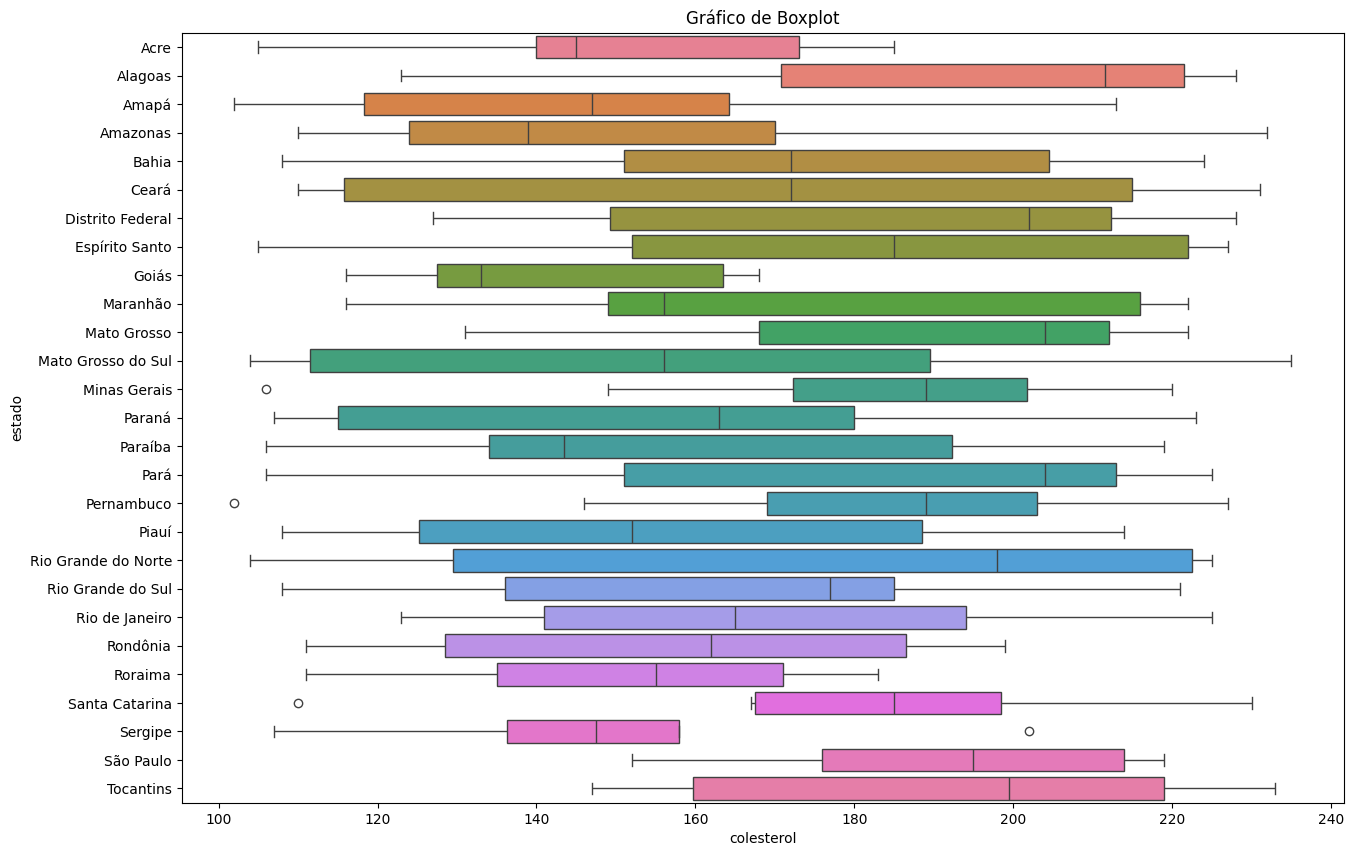

In [ ]:
# Criando gráfico de boxplot da distribuição de colesterol por estado
plt.figure(figsize=(15, 10))
plt.title('Gráfico de Boxplot')
sns.boxplot(x = 'colesterol', y = 'estado', data = cluster_clientes.sort_values('estado'), orient='h', hue='estado')

<Axes: title={'center': 'Gráfico de Boxplot'}, xlabel='peso', ylabel='estado'>

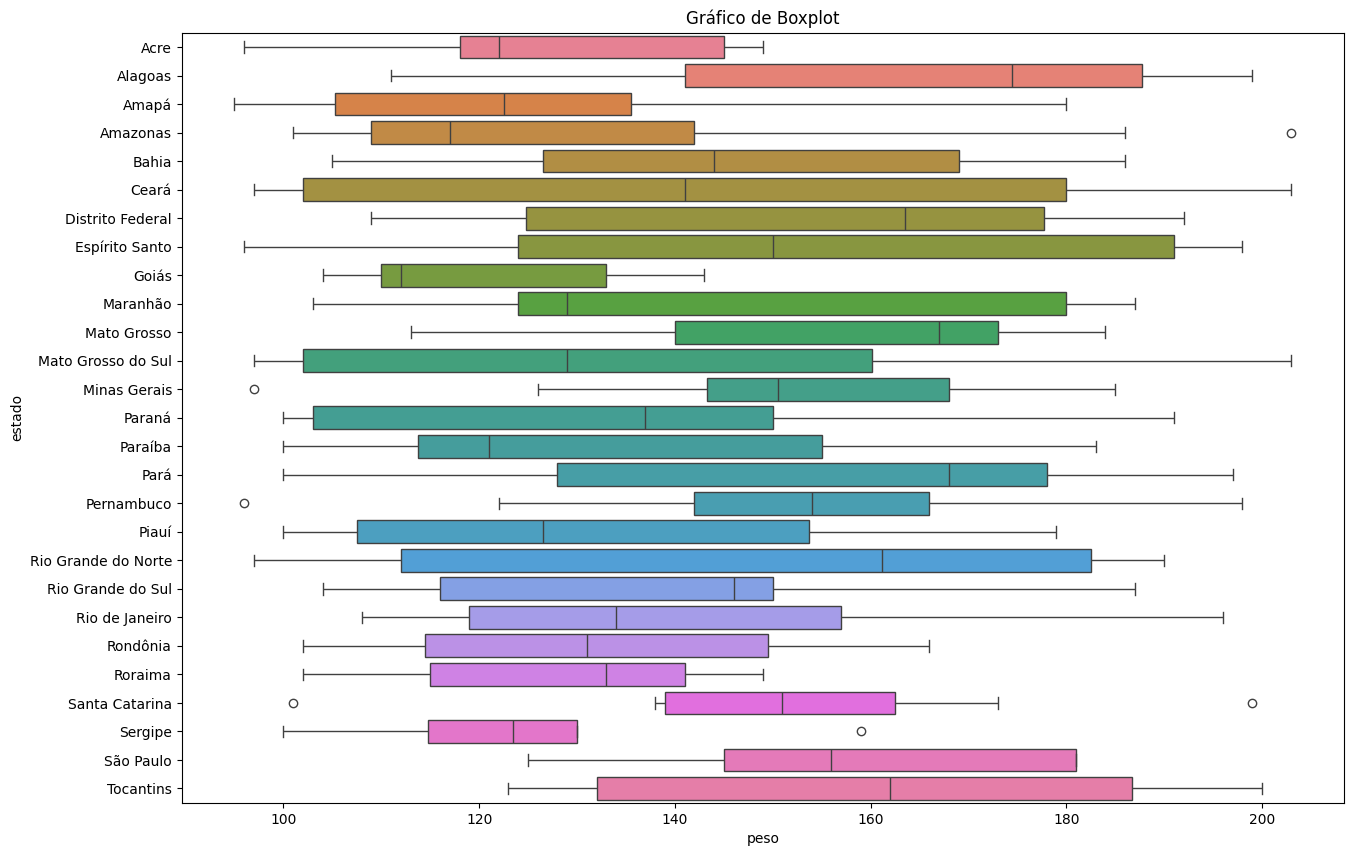

In [ ]:
# Criando gráfico de boxplot da distribuição de peso por estado
plt.figure(figsize=(15, 10))
plt.title('Gráfico de Boxplot')
sns.boxplot(x='peso', y='estado', data=cluster_clientes.sort_values('estado'), orient='h', hue='estado')

<Axes: title={'center': 'Gráfico de Boxplot'}, xlabel='colesterol', ylabel='nome_cluster'>

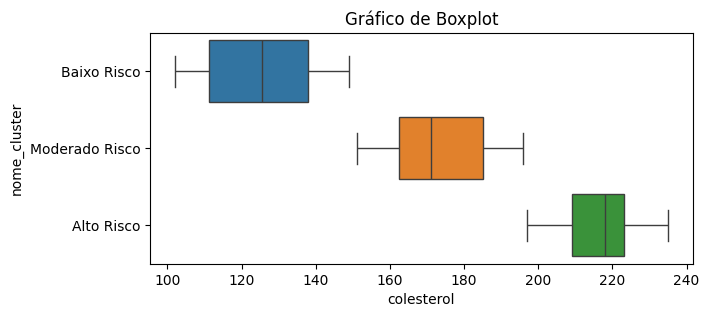

In [ ]:
# Criando gráfico de boxplot da distribuição de colesterol por cluster
plt.figure(figsize=(7, 3))
plt.title('Gráfico de Boxplot')
sns.boxplot(x = 'colesterol', y = 'nome_cluster', data = cluster_clientes, orient='h', hue='nome_cluster')

<Axes: title={'center': 'Gráfico de Boxplot'}, xlabel='peso', ylabel='nome_cluster'>

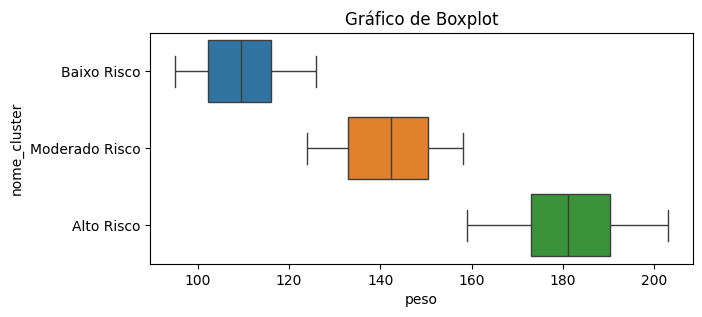

In [ ]:
# Criando gráfico de boxplot da distribuição de peso por cluster
plt.figure(figsize=(7, 3))
plt.title('Gráfico de Boxplot')
sns.boxplot(x = 'peso', y = 'nome_cluster', data = cluster_clientes, orient='h', hue='nome_cluster')

<Axes: title={'center': 'Gráfico de Boxplot'}, xlabel='idade', ylabel='nome_cluster'>

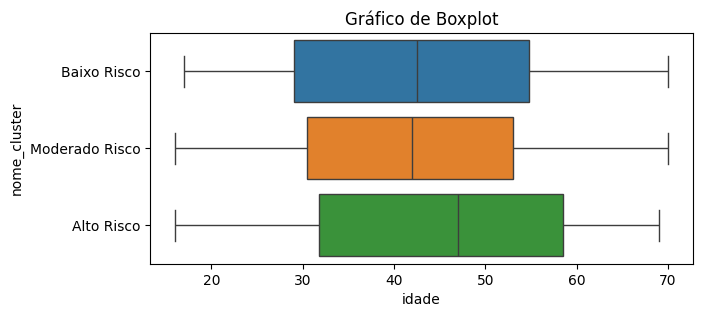

In [ ]:
# Criando gráfico de boxplot da distribuição de idade por cluster
plt.figure(figsize=(7, 3))
plt.title('Gráfico de Boxplot')
sns.boxplot(x = 'idade', y = 'nome_cluster', data = cluster_clientes, orient='h', hue='nome_cluster')

## Análises do clusters criados

In [ ]:
# Agrupando dados de cluster por gênero
cluster_clientes.groupby(['nome_cluster', 'genero'], as_index=False).agg(total=('genero','count'))

,nome_cluster,genero,total
0,Alto Risco,Feminino,28
1,Alto Risco,Masculino,40
2,Baixo Risco,Feminino,39
3,Baixo Risco,Masculino,43
4,Moderado Risco,Feminino,44
5,Moderado Risco,Masculino,31


In [ ]:
# Média dos pesos dos clientes por gênero, estado e cluster
cluster_clientes.groupby(['nome_cluster', 'genero','estado'], as_index=False).agg(media=('peso','mean'))

,nome_cluster,genero,estado,media
0,Alto Risco,Feminino,Amazonas,164.000000
1,Alto Risco,Feminino,Bahia,185.500000
2,Alto Risco,Feminino,Ceará,177.000000
3,Alto Risco,Feminino,Distrito Federal,181.666667
4,Alto Risco,Feminino,Espírito Santo,193.000000
...,...,...,...,...
111,Moderado Risco,Masculino,Rio de Janeiro,141.000000
112,Moderado Risco,Masculino,Rondônia,139.440000
113,Moderado Risco,Masculino,Roraima,145.333333
114,Moderado Risco,Masculino,Santa Catarina,151.500000


In [ ]:
# Criar novo dataframe com as médias dos pesos
media_pesos = cluster_clientes.groupby(['nome_cluster', 'genero','estado'], as_index=False).agg(media=('peso','mean'))

<Axes: title={'center': 'Distribuição das médias por cluster'}, xlabel='nome_cluster', ylabel='media'>

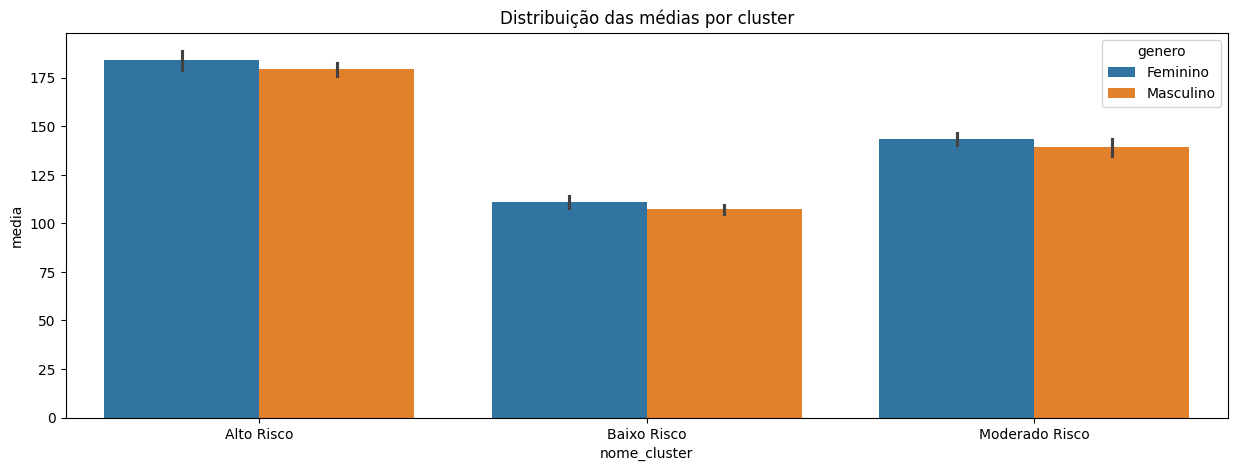

In [ ]:
# Criar gráfico de barras com as médias dos pesos por cluster
plt.figure(figsize=(15,5))
plt.title('Distribuição das médias por cluster')
sns.barplot(x='nome_cluster', y='media', data=media_pesos, hue='genero')

In [ ]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster') ['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0
Baixo Risco,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Moderado Risco,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0


In [ ]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster') ['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,68,24,Distrito Federal,6
Baixo Risco,82,26,Amazonas,8
Moderado Risco,75,26,Roraima,5


In [ ]:
# Visualizando dados de clientes de Alto Risco
cluster_clientes.query('nome_cluster == "Alto Risco" and estado == "Distrito Federal"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster,nome_cluster
46,47,Masculino,68,183.0,218,7,Distrito Federal,DF,0,Alto Risco
57,58,Feminino,39,170.0,208,7,Distrito Federal,DF,0,Alto Risco
123,124,Feminino,28,192.0,228,7,Distrito Federal,DF,0,Alto Risco
130,131,Feminino,21,183.0,213,7,Distrito Federal,DF,0,Alto Risco
132,133,Masculino,69,173.0,208,7,Distrito Federal,DF,0,Alto Risco
224,225,Masculino,57,176.0,212,7,Distrito Federal,DF,0,Alto Risco


In [ ]:
# Realizando agrupamento por número de cluster e gênero / peso
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%     50%  \
nome_cluster   genero                                                           
Alto Risco     Feminino    28.0  183.571429  10.318730  161.0  178.00  185.00   
               Masculino   40.0  180.700000  11.688697  159.0  172.50  179.00   
Baixo Risco    Feminino    39.0  111.153846   8.692218   96.0  106.00  112.00   
               Masculino   43.0  108.558140   8.511343   95.0  102.00  106.00   
Moderado Risco Feminino    44.0  142.825455  10.115751  124.0  134.75  142.00   
               Masculino   31.0  140.827097  10.087216  124.0  130.50  142.32   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   191.00  203.0  
               Masculino  187.25  203.0  
Baixo Risco    Feminino   118.00  126.0  
               Masculino  115.50  124.0  
Moderado Risco Feminino   153.25  158.0  
               Masculino  149.50  157.0

In [ ]:
# Realizando agrupamento por número de cluster e gênero / colesterol
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Alto Risco     Feminino    28.0  217.964286   8.795968  197.0  213.00  220.5   
               Masculino   40.0  215.200000   9.468436  199.0  207.75  214.0   
Baixo Risco    Feminino    39.0  127.538462  13.890258  102.0  117.50  128.0   
               Masculino   43.0  123.000000  14.548769  102.0  110.00  120.0   
Moderado Risco Feminino    44.0  173.772727  14.085889  152.0  163.00  169.0   
               Masculino   31.0  172.419355  13.836604  151.0  158.00  175.0   

                            75%    max  
nome_cluster   genero                   
Alto Risco     Feminino   224.0  235.0  
               Masculino  222.0  233.0  
Baixo Risco    Feminino   139.0  149.0  
               Masculino  136.0  149.0  
Moderado Risco Feminino   189.0  196.0  
               Masculino  183.5  195.0

## Exportando dados

In [95]:
cluster_clientes.to_csv('classificacao_clientes_cluster.csv', sep=';', encoding='latin-1')